In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [6]:
from google.colab import files
uploaded = files.upload()


Saving Housing.csv to Housing.csv


In [7]:
df = pd.read_csv("Housing.csv")  # Replace with your actual file
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mea

In [11]:
# Binary yes/no columns → 0/1:
binary_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes':1, 'no':0})

# Furnishing status → one-hot encoding:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


In [12]:
binary_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea']

In [13]:
df

,price,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,2,3,1,0,0,0,1,2,1,False,False,True,False,False,False,False
1,12250000,8960,4,4,1,0,0,0,1,3,0,False,False,True,False,False,False,False
2,12250000,9960,2,2,1,0,1,0,0,2,1,False,True,False,False,False,True,False
3,12215000,7500,2,2,1,0,1,0,1,3,1,False,False,True,False,False,False,False
4,11410000,7420,1,2,1,1,1,0,1,2,0,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,1,1,1,0,1,0,0,2,0,True,False,False,False,False,False,True
541,1767150,2400,1,1,0,0,0,0,0,0,0,False,True,False,False,False,True,False
542,1750000,3620,1,1,1,0,0,0,0,0,0,True,False,False,False,False,False,True
543,1750000,2910,1,1,0,0,0,0,0,0,0,False,True,False,False,False,False,False


In [14]:
X = df.drop('price', axis=1)
y = df['price']


In [15]:
X

,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,2,3,1,0,0,0,1,2,1,False,False,True,False,False,False,False
1,8960,4,4,1,0,0,0,1,3,0,False,False,True,False,False,False,False
2,9960,2,2,1,0,1,0,0,2,1,False,True,False,False,False,True,False
3,7500,2,2,1,0,1,0,1,3,1,False,False,True,False,False,False,False
4,7420,1,2,1,1,1,0,1,2,0,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,1,1,1,0,1,0,0,2,0,True,False,False,False,False,False,True
541,2400,1,1,0,0,0,0,0,0,0,False,True,False,False,False,True,False
542,3620,1,1,1,0,0,0,0,0,0,True,False,False,False,False,False,True
543,2910,1,1,0,0,0,0,0,0,0,False,True,False,False,False,False,False


In [16]:
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [17]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['area', 'bedrooms','bathrooms','stories','parking']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


KeyError: "['bedrooms'] not in index"

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)


In [20]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

mae_lr, rmse_lr = evaluate(y_test, y_pred_lr)
print("Linear Regression → MAE:", mae_lr, "RMSE:", rmse_lr)

mae_gb, rmse_gb = evaluate(y_test, y_pred_gb)
print("Gradient Boosting → MAE:", mae_gb, "RMSE:", rmse_gb)


Linear Regression → MAE: 969447.5691818014 RMSE: 1324866.0716974123
Gradient Boosting → MAE: 965007.3011985208 RMSE: 1330503.5136425344


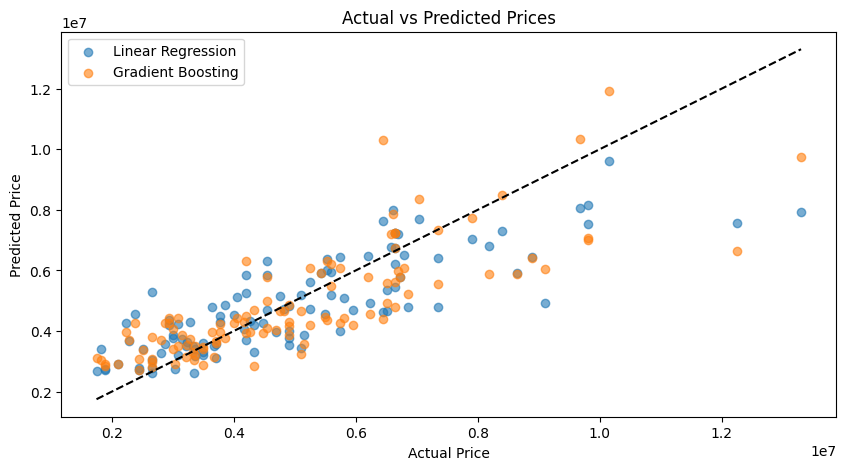

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_lr, alpha=0.6, label="Linear Regression")
plt.scatter(y_test, y_pred_gb, alpha=0.6, label="Gradient Boosting")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()
